To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News

**Read our [blog post](https://unsloth.ai/blog/r1-reasoning) for guidance on how to train reasoning models.**

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

In [ ]:
%%capture
# Skip restarting message in Colab
import sys; modules = list(sys.modules.keys())
for x in modules: sys.modules.pop(x) if "PIL" in x or "google" in x else None

!pip install unsloth vllm
!pip install --upgrade pillow

### Unsloth

Use `PatchFastRL` before all functions to patch GRPO and other RL algorithms!

In [ ]:
from unsloth import FastLanguageModel, PatchFastRL
PatchFastRL("GRPO", FastLanguageModel)

Unsloth: Patching Xformers to fix some performance issues.
🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


Load up `Qwen 2.5 3B Instruct`, and set parameters

In [ ]:
from unsloth import is_bfloat16_supported
import torch
max_seq_length = 1024 # Can increase for longer reasoning traces
lora_rank = 64 # Larger rank = smarter, but slower

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "Qwen/Qwen2.5-3B-Instruct", # Qwen2.5-3B-Instruct-openai/gsm8k
    max_seq_length = max_seq_length,
    load_in_4bit = True, # False for LoRA 16bit
    fast_inference = True, # Enable vLLM fast inference
    max_lora_rank = lora_rank,
    gpu_memory_utilization = 0.5, # Reduce if out of memory
)

model = FastLanguageModel.get_peft_model(
    model,
    r = lora_rank, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
    ], # Remove QKVO if out of memory
    lora_alpha = lora_rank,
    use_gradient_checkpointing = "unsloth", # Enable long context finetuning
    random_state = 3407,
)

INFO 03-02 21:39:23 __init__.py:207] Automatically detected platform cuda.
==((====))==  Unsloth 2025.2.15: Fast Qwen2 patching. Transformers: 4.48.3.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: vLLM loading unsloth/qwen2.5-3b-instruct-unsloth-bnb-4bit with actual GPU utilization = 49.66%
Unsloth: Your GPU has CUDA compute capability 7.5 with VRAM = 14.74 GB.
Unsloth: Using conservativeness = 1.0. Chunked prefill tokens = 1024. Num Sequences = 192.
Unsloth: vLLM's KV Cache can use up to 4.9 GB. Also swap space = 6 GB.
WARNING 03-02 21:39:26 config.py:2448] Casting torch.bfloat16 to torch.float16.
INFO 03-02 21:39:38 config.py:549] This model suppor

tokenizer_config.json:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

INFO 03-02 21:39:49 cuda.py:178] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 03-02 21:39:49 cuda.py:226] Using XFormers backend.
INFO 03-02 21:39:50 model_runner.py:1110] Starting to load model unsloth/qwen2.5-3b-instruct-unsloth-bnb-4bit...
INFO 03-02 21:39:50 loader.py:1089] Loading weights with BitsAndBytes quantization.  May take a while ...
INFO 03-02 21:39:50 weight_utils.py:254] Using model weights format ['*.safetensors']


model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

INFO 03-02 21:39:57 weight_utils.py:270] Time spent downloading weights for unsloth/qwen2.5-3b-instruct-unsloth-bnb-4bit: 6.889293 seconds


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 03-02 21:40:01 model_runner.py:1115] Loading model weights took 2.2160 GB
INFO 03-02 21:40:01 punica_selector.py:18] Using PunicaWrapperGPU.
INFO 03-02 21:40:10 worker.py:267] Memory profiling takes 8.15 seconds
INFO 03-02 21:40:10 worker.py:267] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.50) = 7.32GiB
INFO 03-02 21:40:10 worker.py:267] model weights take 2.22GiB; non_torch_memory takes 0.05GiB; PyTorch activation peak memory takes 1.05GiB; the rest of the memory reserved for KV Cache is 4.01GiB.
INFO 03-02 21:40:10 executor_base.py:111] # cuda blocks: 7300, # CPU blocks: 10922
INFO 03-02 21:40:10 executor_base.py:116] Maximum concurrency for 1024 tokens per request: 114.06x
INFO 03-02 21:40:15 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error o

Capturing CUDA graph shapes: 100%|██████████| 27/27 [00:39<00:00,  1.47s/it]

INFO 03-02 21:40:55 model_runner.py:1562] Graph capturing finished in 40 secs, took 0.62 GiB
INFO 03-02 21:40:55 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 53.58 seconds


tokenizer_config.json:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Unsloth 2025.2.15 patched 36 layers with 36 QKV layers, 36 O layers and 36 MLP layers.


### Use Deepseek to Enhance Reasoning

In [ ]:
from google.colab import userdata
TOGETHER_API_KEY = userdata.get('TOGETHER_API_KEY')

#### Define API Using Together Client

In [ ]:
try:
    import together
except ImportError:
    import subprocess
    import sys
    print("🔹 'together' package not found. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "together"])
    import together  # Retry import after installation

print("✅ 'together' package is successfully imported.")

🔹 'together' package not found. Installing...
✅ 'together' package is successfully imported.


In [ ]:
# from together import Together

# class ChatBot:
#     """
#     A simple ChatBot class to interact with a Together LLM model.

#     Attributes:
#         api_key (str): The API key used to authenticate with the Together API.
#         client (Together): A Together client for making requests.
#         history (list[dict]): A list of dictionaries representing the conversation history.
#     """

#     def __init__(self, api_key: str) -> None:
#         """
#         Initializes the ChatBot with a given API key and an empty conversation history.
#         Also creates a Together client instance for making requests.

#         Args:
#             api_key (str): The API key for Together.
#         """
#         self.api_key: str = api_key
#         self.client: Together = Together(api_key=self.api_key)
#         self.history: list[dict] = []

#     def append_history(self, role: str, content: str) -> None:
#         """
#         Appends a new message entry to the conversation history.

#         Args:
#             role (str): The role of the message sender, e.g., "user" or "assistant".
#             content (str): The message content to be appended.
#         """
#         self.history.append({"role": role, "content": content})

#     def invoke_api(
#         self,
#         model: str = "deepseek-ai/DeepSeek-V3",
#         max_tokens: int = 512,
#         temperature: float = 0.7,
#         top_p: float = 0.7,
#         top_k: int = 50,
#         repetition_penalty: float = 1.0,
#         stop: list[str] = ["<｜end▁of▁sentence｜>"]
#     ) -> str:
#         """
#         Invokes the Together chat API using the stored conversation history.

#         Args:
#             model (str, optional): The name of the Together model to use. Defaults to "deepseek-ai/DeepSeek-R1".
#             max_tokens (int, optional): The maximum number of tokens in the response. Defaults to 1024.
#             temperature (float, optional): The sampling temperature. Defaults to 0.7.
#             top_p (float, optional): The top_p sampling parameter. Defaults to 0.7.
#             top_k (int, optional): The top_k sampling parameter. Defaults to 50.
#             repetition_penalty (float, optional): The repetition penalty parameter. Defaults to 1.0.
#             stop (list[str], optional): A list of stop tokens. Defaults to ["<｜end▁of▁sentence｜>"].

#         Returns:
#             str: The collapsed string response from the API.
#         """
#         response = self.client.chat.completions.create(
#             model=model,
#             messages=self.history,
#             max_tokens=max_tokens,
#             temperature=temperature,
#             top_p=top_p,
#             top_k=top_k,
#             repetition_penalty=repetition_penalty,
#             stop=stop,
#             stream=True
#         )
#         answer: str = self.collapse_response(response)
#         return answer

#     def collapse_response(self, response) -> str:
#         """
#         Collapses a streaming response from the Together API into a single string.

#         Args:
#             response: The streaming response object from the Together API.

#         Returns:
#             str: A single string containing the concatenated content from each token in the response.
#         """
#         answer: str = ""
#         for token in response:
#             if hasattr(token, "choices"):
#                 try:
#                     answer += token.choices[0].delta.content
#                 except:
#                     pass
#         return answer

#     def show_history(self) -> None:
#         """
#         Prints the entire conversation history.
#         """
#         print(self.history)


### Data Prep
<a name="Data"></a>

We directly leverage [@willccbb](https://gist.github.com/willccbb/4676755236bb08cab5f4e54a0475d6fb) for data prep and all reward functions. You are free to create your own!

In [ ]:
import re
from datasets import load_dataset, Dataset

# Load and prep dataset
SYSTEM_PROMPT = """
Respond in the following format:
<reasoning>
...
</reasoning>
<answer>
...
</answer>
"""

XML_COT_FORMAT = """\
<reasoning>
{reasoning}
</reasoning>
<answer>
{answer}
</answer>
"""

def extract_xml_answer(text: str) -> str:
    answer = text.split("<answer>")[-1]
    answer = answer.split("</answer>")[0]
    return answer.strip()

def extract_hash_answer(text: str) -> str | None:
    if "####" not in text:
        return None
    return text.split("####")[1].strip()

# from datasets import Dataset
# from tqdm import tqdm  # For progress tracking

# # Function to augment an answer using the ChatBot
# def augment_answer(example):
#     """
#     Takes a dictionary containing a 'question' and 'answer',
#     creates a new ChatBot instance with a clean history,
#     calls the ChatBot, and replaces the answer with the augmented response.
#     """
#     # Instantiate a new ChatBot (clean slate)
#     bot = ChatBot(api_key=TOGETHER_API_KEY)

#     # Set up initial chatbot history
#     bot.history = [
#         {"role": "assistant", "content": "You always provide reasoning. Your answer starts from <think>xxx</think> and <response>."}
#     ]

#     current_question = example["question"]
#     current_answer = example["answer"]

#     # Construct the augmented content
#     augmented_content = f"Provide reasoning how to answer question: {current_question} and to arrive with answer: {current_answer}"

#     # Append question to chatbot history
#     bot.append_history(role="user", content=augmented_content)

#     # Call API and get response
#     response = bot.invoke_api()

#     # Update the answer field with the model's response
#     example["answer"] = response  # Assign bot output to 'answer'

#     return example

# uncomment middle messages for 1-shot prompting
def get_gsm8k_questions(split = "train") -> Dataset:
    """
    Convert to the following schema:
        Dataset({
            features: ['question', 'answer', 'prompt'],
            num_rows: 7473
        })
    """
    data = load_dataset('openai/gsm8k', 'main')[split] # type: ignore
    # Select only the first 100 samples
    data = data.select(range(100))
    data = data.map(lambda x: { # type: ignore
        'prompt': [
            {'role': 'system', 'content': SYSTEM_PROMPT},
            {'role': 'user', 'content': x['question']}
        ],
        'answer': extract_hash_answer(x['answer'])
    }) # type: ignore
    return data # type: ignore

In [ ]:
%%time

dataset = get_gsm8k_questions()

README.md:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7473 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1319 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

CPU times: user 388 ms, sys: 104 ms, total: 492 ms
Wall time: 16.6 s


In [ ]:
# Reward functions
def correctness_reward_func(prompts, completions, answer, **kwargs) -> list[float]:
    responses = [completion[0]['content'] for completion in completions]
    q = prompts[0][-1]['content']
    extracted_responses = [extract_xml_answer(r) for r in responses]
    print('-'*20, f"Question:\n{q}", f"\nAnswer:\n{answer[0]}", f"\nResponse:\n{responses[0]}", f"\nExtracted:\n{extracted_responses[0]}")
    return [2.0 if r == a else 0.0 for r, a in zip(extracted_responses, answer)]

def int_reward_func(completions, **kwargs) -> list[float]:
    responses = [completion[0]['content'] for completion in completions]
    extracted_responses = [extract_xml_answer(r) for r in responses]
    return [0.5 if r.isdigit() else 0.0 for r in extracted_responses]

def strict_format_reward_func(completions, **kwargs) -> list[float]:
    """Reward function that checks if the completion has a specific format."""
    pattern = r"^<reasoning>\n.*?\n</reasoning>\n<answer>\n.*?\n</answer>\n$"
    responses = [completion[0]["content"] for completion in completions]
    matches = [re.match(pattern, r) for r in responses]
    return [0.5 if match else 0.0 for match in matches]

def soft_format_reward_func(completions, **kwargs) -> list[float]:
    """Reward function that checks if the completion has a specific format."""
    pattern = r"<reasoning>.*?</reasoning>\s*<answer>.*?</answer>"
    responses = [completion[0]["content"] for completion in completions]
    matches = [re.match(pattern, r) for r in responses]
    return [0.5 if match else 0.0 for match in matches]

def count_xml(text) -> float:
    count = 0.0
    if text.count("<reasoning>\n") == 1:
        count += 0.125
    if text.count("\n</reasoning>\n") == 1:
        count += 0.125
    if text.count("\n<answer>\n") == 1:
        count += 0.125
        count -= len(text.split("\n</answer>\n")[-1])*0.001
    if text.count("\n</answer>") == 1:
        count += 0.125
        count -= (len(text.split("\n</answer>")[-1]) - 1)*0.001
    return count

def xmlcount_reward_func(completions, **kwargs) -> list[float]:
    contents = [completion[0]["content"] for completion in completions]
    return [count_xml(c) for c in contents]

<a name="Train"></a>
### Train the model

Now set up GRPO Trainer and all configurations!

In [ ]:
from trl import GRPOConfig, GRPOTrainer

training_args = GRPOConfig(
    use_vllm = True,  # Use vLLM for fast inference
    learning_rate = 5e-6,  # Learning rate for optimization
    adam_beta1 = 0.9,  # Beta1 for Adam optimizer (momentum term)
    adam_beta2 = 0.99,  # Beta2 for Adam optimizer (RMS term)
    weight_decay = 0.1,  # Regularization to prevent overfitting
    warmup_ratio = 0.1,  # Fraction of training steps for learning rate warmup
    lr_scheduler_type = "cosine",  # Cosine decay for learning rate scheduling
    optim = "adamw_8bit",  # AdamW optimizer with 8-bit precision for memory efficiency
    logging_steps = 1,  # Log metrics after every step
    bf16 = is_bfloat16_supported(),  # Use bfloat16 if supported for efficient training
    fp16 = not is_bfloat16_supported(),  # Use fp16 if bfloat16 is not available
    per_device_train_batch_size = 1,  # Number of training examples per device
    gradient_accumulation_steps = 1,  # Number of steps to accumulate gradients before updating weights
    num_generations = 8,  # Number of completions per prompt; reduce if facing OOM errors
    max_prompt_length = 256,  # Maximum length of input prompts
    max_completion_length = 200,  # Maximum length of generated responses
    # num_train_epochs = 1,  # Uncomment for a full training run
    max_steps = 80,  # Total number of training steps
    save_steps = 5,  # Save model every 250 steps
    max_grad_norm = 0.1,  # Gradient clipping to prevent exploding gradients
    report_to = "none",  # Change to "wandb" for logging with Weights & Biases
    output_dir = "outputs",  # Directory to save training artifacts
)

Unsloth: We now expect `per_device_train_batch_size` to be a multiple of `num_generations`.
We will change the batch size of 1 to the `num_generations` of 8


And let's run the trainer! If you scroll up, you'll see a table of rewards. The goal is to see the `reward` column increase!

You might have to wait 150 to 200 steps for any action. You'll probably get 0 reward for the first 100 steps. Please be patient!

| Step | Training Loss | reward    | reward_std | completion_length | kl       |
|------|---------------|-----------|------------|-------------------|----------|
| 1    | 0.000000      | 0.125000  | 0.000000   | 200.000000        | 0.000000 |
| 2    | 0.000000      | 0.072375  | 0.248112   | 200.000000        | 0.000000 |
| 3    | 0.000000      | -0.079000 | 0.163776   | 182.500000        | 0.000005 |


In [ ]:
%%time

trainer = GRPOTrainer(
    model = model,  # The model being fine-tuned
    processing_class = tokenizer,  # Tokenizer for processing text input
    reward_funcs = [  # List of reward functions used for RL-based training
        xmlcount_reward_func,  # Rewards based on XML tag count
        soft_format_reward_func,  # Rewards based on soft formatting adherence
        strict_format_reward_func,  # Rewards based on strict formatting rules
        int_reward_func,  # Rewards based on integer correctness
        correctness_reward_func,  # Rewards based on overall correctness of output
    ],
    args = training_args,  # Training arguments defined earlier
    train_dataset = dataset,  # Training dataset used for model fine-tuning
)

trainer.train()  # Start the training process

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 100 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 8 | Gradient Accumulation steps = 1
\        /    Total batch size = 8 | Total steps = 80
 "-____-"     Number of trainable parameters = 119,734,272


-------------------- Question:
Every hour Joanne has to collect the coins out of the fountain inside the mall. During the first hour, she collected 15 coins. For the next two hours, she collected 35 coins from the fountain. In the fourth hour, she collected 50 coins from the fountain but she gave 15 of them to her coworker so she could buy a soda. How many coins did she have after the fourth hour? 
Answer:
120 
Response:
<reasoning>
To find out how many coins Joanne had after the fourth hour, we will add up the coins she collected each hour and account for any coins she had to give away. Here's the step-by-step breakdown:

1. **First Hour:** Joanne collected 15 coins.
2. **Second and Third Hours:** Joanne collected 35 coins each hour, so the total from the second and third hours is \(35 + 35 = 70\) coins.
3. **Fourth Hour:** She collected 50 coins but gave 15 coins to her coworker. Thus, the coins she kept after giving some away in the fourth hour would be \(50 - 15 = 35\) coins.

Now,

Step,Training Loss,reward,reward_std,completion_length,kl,rewards / xmlcount_reward_func,rewards / soft_format_reward_func,rewards / strict_format_reward_func,rewards / int_reward_func,rewards / correctness_reward_func
1,0.000400,0.071750,0.150614,200.000000,0.010029,0.071750,0.000000,0.000000,0.000000,0.000000
2,0.000800,0.125000,0.000000,200.000000,0.020438,0.125000,0.000000,0.000000,0.000000,0.000000
3,0.000100,0.125000,0.000000,200.000000,0.002206,0.125000,0.000000,0.000000,0.000000,0.000000
4,0.000200,0.105375,0.055508,200.000000,0.005159,0.105375,0.000000,0.000000,0.000000,0.000000
5,0.000100,0.125000,0.000000,200.000000,0.002441,0.125000,0.000000,0.000000,0.000000,0.000000
6,0.000100,0.125000,0.000000,200.000000,0.002592,0.125000,0.000000,0.000000,0.000000,0.000000
7,0.000400,0.094375,0.086621,199.375000,0.011054,0.094375,0.000000,0.000000,0.000000,0.000000
8,0.000100,0.042500,0.233345,200.000000,0.003742,0.042500,0.000000,0.000000,0.000000,0.000000
9,0.000500,0.140625,0.044194,200.000000,0.011817,0.140625,0.000000,0.000000,0.000000,0.000000
10,0.000200,0.095000,0.084853,198.250000,0.005716,0.095000,0.000000,0.000000,0.000000,0.000000


-------------------- Question:
It is Roger’s turn to provide a snack for the baseball team after the game and he has decided to bring trail mix. The trail mix comes in packs of 6 individual pouches. Roger has 13 members on his baseball team, plus 3 coaches and 2 helpers. How many packs of trail mix does he need to buy? 
Answer:
3 
Response:
<reasoning>
To determine how many packs of trail mix Roger needs to buy, we first need to calculate the total number of people who will be having the snack. Roger's baseball team consists of 13 members, and there are 3 coaches and 2 helpers. Adding these numbers gives us the total number of people.

\[ 13 \text{ (team members)} + 3 \text{ (coaches)} + 2 \text{ (helpers)} = 18 \text{ people} \]

Each pack of trail mix contains 6 individual pouches, which will be shared among the 18 people. To find out how many packs are needed, we need to divide the total number of people by the number of pouches per pack and round up to the nearest whole number sinc

TrainOutput(global_step=80, training_loss=0.0005925283876877074, metrics={'train_runtime': 1937.7829, 'train_samples_per_second': 0.33, 'train_steps_per_second': 0.041, 'total_flos': 0.0, 'train_loss': 0.0005925283876877074})

## Plot

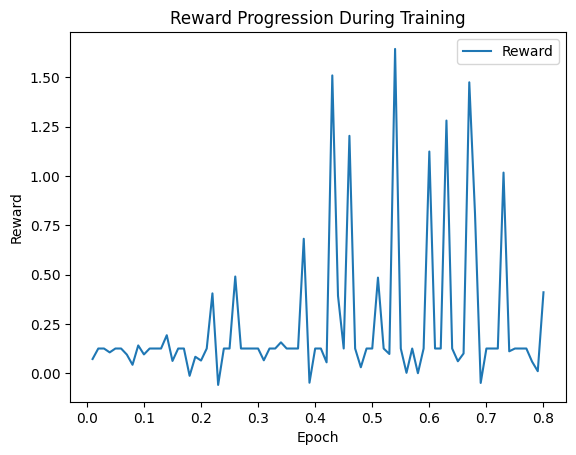

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract log history from trainer
log_history = trainer.state.log_history

# Convert to DataFrame
df = pd.DataFrame(log_history)

# Filter relevant columns
if 'reward' in df.columns:
    plt.plot(df['epoch'], df['reward'], label='Reward')
    plt.xlabel('Epoch')
    plt.ylabel('Reward')
    plt.title('Reward Progression During Training')
    plt.legend()
    plt.show()
else:
    print("No reward data found in trainer log history.")


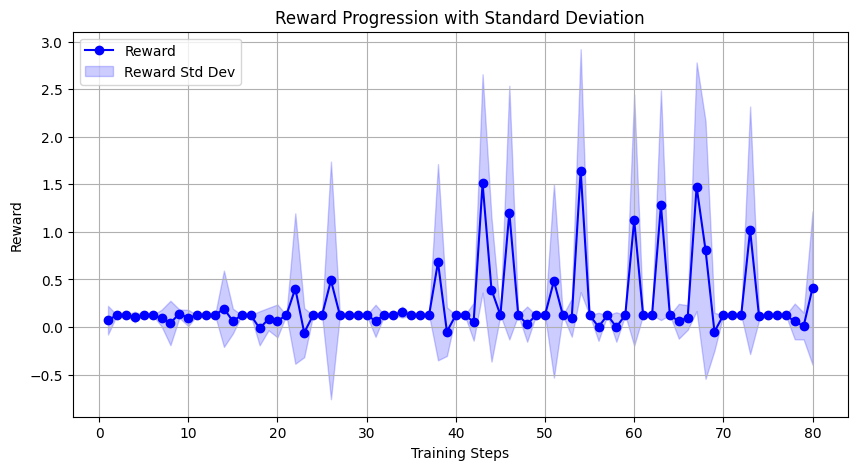

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract log history
log_history = trainer.state.log_history
df = pd.DataFrame(log_history)

# Ensure step, reward, and reward_std exist in the data
if 'step' in df.columns and 'reward' in df.columns and 'reward_std' in df.columns:
    steps = df['step']
    reward = df['reward']
    reward_std = df['reward_std']

    # Plot reward progression with error bars
    plt.figure(figsize=(10, 5))
    plt.plot(steps, reward, label='Reward', color='blue', marker='o', linestyle='-')

    # Add standard deviation as a shaded region
    plt.fill_between(steps, reward - reward_std, reward + reward_std, color='blue', alpha=0.2, label='Reward Std Dev')

    # Labels and title
    plt.xlabel('Training Steps')
    plt.ylabel('Reward')
    plt.title('Reward Progression with Standard Deviation')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("No step, reward, or reward_std data found in trainer log history.")


<a name="Inference"></a>
### Inference
Now let's try the model we just trained! First, let's first try the model without any GRPO trained:

In [ ]:
text = tokenizer.apply_chat_template([
    {"role" : "user", "content" : "How many r's are in strawberry?"},
], tokenize = False, add_generation_prompt = True)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 0.8,
    top_p = 0.95,
    max_tokens = 1024,
)
output = model.fast_generate(
    [text],
    sampling_params = sampling_params,
    lora_request = None,
)[0].outputs[0].text

output

And now with the LoRA we just trained with GRPO - we first save the LoRA first!

In [ ]:
model.save_lora("grpo_saved_lora")

Now we load the LoRA and test:

In [ ]:
text = tokenizer.apply_chat_template([
    {"role" : "system", "content" : SYSTEM_PROMPT},
    {"role" : "user", "content" : "How many r's are in strawberry?"},
], tokenize = False, add_generation_prompt = True)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 0.8,
    top_p = 0.95,
    max_tokens = 1024,
)
output = model.fast_generate(
    text,
    sampling_params = sampling_params,
    lora_request = model.load_lora("grpo_saved_lora"),
)[0].outputs[0].text

output

Our reasoning model is much better - it's not always correct, since we only trained it for an hour or so - it'll be better if we extend the sequence length and train for longer!

<a name="Save"></a>
### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16 or `merged_4bit` for int4. We also allow `lora` adapters as a fallback. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [ ]:
from huggingface_hub import HfApi

# Define repository name and Hugging Face credentials
repo_name = "qwen-2-5-3b-instruct-using-openai-gsm8k-data-enhanced-with-deepseek-v3-small"  # Change this to your desired repository name
username = "xxx"  # Change this to your Hugging Face username
hf_token = "hf_xxx"  # Replace this with your actual Hugging Face token

# Full Hugging Face repo path
hf_repo = f"{username}/{repo_name}"

# Initialize Hugging Face API
api = HfApi()

# Ensure repository exists before pushing
existing_repos = [model.id for model in api.list_models(author=username, token=hf_token)]
if hf_repo not in existing_repos:
    print(f"Creating Hugging Face repo: {hf_repo}")
    api.create_repo(repo_id=repo_name, token=hf_token, private=False)  # Set private=True if needed

# Merge to 16-bit
if True:  # Change to True to execute
    model.save_pretrained_merged("model", tokenizer, save_method="merged_16bit")
    model.push_to_hub_merged(hf_repo, tokenizer, save_method="merged_16bit", token=hf_token)

# Just LoRA adapters
if True:  # Change to True to execute
    model.save_pretrained_merged("model", tokenizer, save_method="lora")
    model.push_to_hub_merged(hf_repo, tokenizer, save_method="lora", token=hf_token)

print(f"✅ Model pushed successfully to: https://huggingface.co/{hf_repo}")

Unsloth: Kaggle/Colab has limited disk space. We need to delete the downloaded
model which will save 4-16GB of disk space, allowing you to save on Kaggle/Colab.
Unsloth: Will remove a cached repo with size 2.4G


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 23.02 out of 50.99 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


 69%|██████▉   | 25/36 [00:00<00:00, 38.74it/s]
We will save to Disk and not RAM now.
100%|██████████| 36/36 [00:03<00:00,  9.47it/s]


Unsloth: Saving tokenizer... Done.
Done.


Unsloth: You are pushing to hub, but you passed your HF username = eagle0504.
We shall truncate eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-data-enhanced-with-deepseek-v3-small to qwen-2-5-3b-instruct-using-openai-gsm8k-data-enhanced-with-deepseek-v3-small


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 22.96 out of 50.99 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


100%|██████████| 36/36 [00:03<00:00,  9.92it/s]


Unsloth: Saving tokenizer...

No files have been modified since last commit. Skipping to prevent empty commit.


 Done.


README.md:   0%|          | 0.00/5.19k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

Done.
Saved merged model to https://huggingface.co/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-data-enhanced-with-deepseek-v3-small
Unsloth: Saving tokenizer... Done.
Unsloth: Saving model...

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

 Done.
Unsloth: Saving LoRA adapters. Please wait...


  0%|          | 0/1 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/479M [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


Saved lora model to https://huggingface.co/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-data-enhanced-with-deepseek-v3-small
✅ Model pushed successfully to: https://huggingface.co/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-data-enhanced-with-deepseek-v3-small


### GGUF / llama.cpp Conversion
To save to `GGUF` / `llama.cpp`, we support it natively now! We clone `llama.cpp` and we default save it to `q8_0`. We allow all methods like `q4_k_m`. Use `save_pretrained_gguf` for local saving and `push_to_hub_gguf` for uploading to HF.

Some supported quant methods (full list on our [Wiki page](https://github.com/unslothai/unsloth/wiki#gguf-quantization-options)):
* `q8_0` - Fast conversion. High resource use, but generally acceptable.
* `q4_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q4_K.
* `q5_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q5_K.

[**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)

In [ ]:
from huggingface_hub import HfApi

# Define repository name and Hugging Face credentials
repo_name = "qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small"  # Change this to your desired repository name
username = "xxx"  # Change this to your Hugging Face username
hf_token = "hf_xxx"  # Replace this with your actual Hugging Face token

# Full Hugging Face repo path
hf_repo = f"{username}/{repo_name}"

# Initialize Hugging Face API
api = HfApi()

# Ensure repository exists before pushing
existing_repos = [model.id for model in api.list_models(author=username, token=hf_token)]
if hf_repo not in existing_repos:
    print(f"Creating Hugging Face repo: {hf_repo}")
    api.create_repo(repo_id=repo_name, token=hf_token, private=False)  # Set private=True if needed

# Save to 8-bit Q8_0
if True:  # Change to True to execute
    model.save_pretrained_gguf("model", tokenizer)
    model.push_to_hub_gguf(hf_repo, tokenizer, token=hf_token)

# Save to 16-bit GGUF
if True:  # Change to True to execute
    model.save_pretrained_gguf("model", tokenizer, quantization_method="f16")
    model.push_to_hub_gguf(hf_repo, tokenizer, quantization_method="f16", token=hf_token)

# Save to multiple GGUF options - much faster if you want multiple!
if True:  # Change to True to execute
    model.push_to_hub_gguf(
        hf_repo,
        tokenizer,
        quantization_method=["q4_k_m", "q8_0", "q5_k_m"],
        token=hf_token,
    )

print(f"✅ Model pushed successfully to: https://huggingface.co/{hf_repo}")

Unsloth: Will remove a cached repo with size 1.4K


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 25.75 out of 50.99 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


100%|██████████| 36/36 [00:00<00:00, 38.91it/s]


Unsloth: Saving tokenizer... Done.
Done.


Unsloth: Converting qwen2 model. Can use fast conversion = False.


==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['q8_0'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...
Unsloth: CMAKE detected. Finalizing some steps for installation.
Unsloth: [1] Converting model at model into q8_0 GGUF format.
The output location will be /content/model/unsloth.Q8_0.gguf
This might take 3 minutes...
INFO:hf-to-gguf:Loading model: model
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-gguf:gguf: loading model weight map from 'model.safetensors.index.json'
INFO:hf-to-gguf:gguf: loading model part 'model-00001-of-00002.safetensors'
INFO:hf-to-gguf:token_embd.weight,         torch.float16 --> Q8_0, shape = {204

100%|██████████| 36/36 [00:00<00:00, 39.67it/s]


Unsloth: Saving tokenizer... Done.
Done.
==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['q8_0'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...
Unsloth: [1] Converting model at eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small into q8_0 GGUF format.
The output location will be /content/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small/unsloth.Q8_0.gguf
This might take 3 minutes...
INFO:hf-to-gguf:Loading model: qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-ggu

  0%|          | 0/1 [00:00<?, ?it/s]

unsloth.Q8_0.gguf:   0%|          | 0.00/3.29G [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


Saved GGUF to https://huggingface.co/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small
Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 25.91 out of 50.99 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


100%|██████████| 36/36 [00:00<00:00, 40.12it/s]


Unsloth: Saving tokenizer... Done.
Done.
==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['f16'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...
Unsloth: [1] Converting model at model into f16 GGUF format.
The output location will be /content/model/unsloth.F16.gguf
This might take 3 minutes...
INFO:hf-to-gguf:Loading model: model
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-gguf:gguf: loading model weight map from 'model.safetensors.index.json'
INFO:hf-to-gguf:gguf: loading model part 'model-00001-of-00002.safetensors'
INFO:hf-to-gguf:token_embd.weight,         torch.float16 --> F16, shape = {2048, 151936}
INFO:hf-to-gguf:b

100%|██████████| 36/36 [00:00<00:00, 40.19it/s]


Unsloth: Saving tokenizer... Done.
Done.
==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['f16'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...
Unsloth: [1] Converting model at eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small into f16 GGUF format.
The output location will be /content/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small/unsloth.F16.gguf
This might take 3 minutes...
INFO:hf-to-gguf:Loading model: qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-gguf:g

  0%|          | 0/1 [00:00<?, ?it/s]

unsloth.F16.gguf:   0%|          | 0.00/6.18G [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


Saved GGUF to https://huggingface.co/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small
Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 25.86 out of 50.99 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


100%|██████████| 36/36 [00:00<00:00, 40.40it/s]


Unsloth: Saving tokenizer... Done.
Done.
==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['q4_k_m', 'q8_0', 'q5_k_m'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...
Unsloth: [1] Converting model at eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small into f16 GGUF format.
The output location will be /content/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small/unsloth.F16.gguf
This might take 3 minutes...
INFO:hf-to-gguf:Loading model: qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model

  0%|          | 0/1 [00:00<?, ?it/s]

unsloth.Q4_K_M.gguf:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


Saved GGUF to https://huggingface.co/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small
Unsloth: Uploading GGUF to Huggingface Hub...


  0%|          | 0/1 [00:00<?, ?it/s]

unsloth.Q8_0.gguf:   0%|          | 0.00/3.29G [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


Saved GGUF to https://huggingface.co/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small
Unsloth: Uploading GGUF to Huggingface Hub...


  0%|          | 0/1 [00:00<?, ?it/s]

unsloth.Q5_K_M.gguf:   0%|          | 0.00/2.22G [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


Saved GGUF to https://huggingface.co/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small
✅ Model pushed successfully to: https://huggingface.co/eagle0504/qwen-2-5-3b-instruct-using-openai-gsm8k-gguf-data-enhanced-with-deepseek-v3-small


Now, use the `model-unsloth.gguf` file or `model-unsloth-Q4_K_M.gguf` file in llama.cpp or a UI based system like Jan or Open WebUI. You can install Jan [here](https://github.com/janhq/jan) and Open WebUI [here](https://github.com/open-webui/open-webui)

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Llama 3.2 Conversational notebook. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(1B_and_3B)-Conversational.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️
</div>
